# Оставь надежду, всяк сюда входящий
## ATTENTION BAD CODE ZONE
**Данный код полон страданий, дублирования, неочевидностей, неоптимальности, переозначений.**

**Владелец данного кода не хочет, чтобы кто-либо пострадал и просит заходить сюда только в случае крайней необходимости.**

💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀💀

In [1]:
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from itertools import accumulate
from matplotlib.ticker import StrMethodFormatter
import optimization as opt
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("seaborn")
params = {'legend.fontsize': '14',
          'figure.figsize': (15, 5),
          'axes.labelsize': '14',
          'axes.titlesize': '14',
          'xtick.labelsize': '12',
          'ytick.labelsize': '12'}
plt.rcParams.update(params)

## Задание №1

In [2]:
X_train = pd.read_csv("_data/toxic_train.csv")
X_test = pd.read_csv("_data/toxic_test.csv")
y_train = X_train["is_toxic"].values
y_test = X_test["is_toxic"].values

In [3]:
y_train = (-1)**(y_train+1)
y_test = (-1)**(y_test+1)

In [4]:
X_train.head(5)

,Unnamed: 0,comment_text,is_toxic
0,0,Explanation\nWhy the edits made under my usern...,False
1,1,D'aww! He matches this background colour I'm s...,False
2,2,"Hey man, I'm really not trying to edit war. It...",False
3,3,"""\nMore\nI can't make any real suggestions on ...",False
4,4,"You, sir, are my hero. Any chance you remember...",False


In [5]:
X_train["is_toxic"].mean(), X_test["is_toxic"].mean(), X_train.shape, X_test.shape

(0.3116536370795797, 0.3019442832269298, (52061, 3), (20676, 3))

In [6]:
X_train.isna().mean()

Unnamed: 0      0.0
comment_text    0.0
is_toxic        0.0
dtype: float64

In [7]:
X_train["comment_text"] = X_train["comment_text"].apply(lambda x: re.sub("[^0-9a-zA-Zа-яА-ЯёЁ]", " ", x.lower()))
X_test["comment_text"] = X_test["comment_text"].apply(lambda x: re.sub("[^0-9a-zA-Zа-яА-ЯёЁ]", " ", x.lower()))
X_train.head(5)

,Unnamed: 0,comment_text,is_toxic
0,0,explanation why the edits made under my userna...,False
1,1,d aww he matches this background colour i m s...,False
2,2,hey man i m really not trying to edit war it...,False
3,3,more i can t make any real suggestions on im...,False
4,4,you sir are my hero any chance you remember...,False


In [8]:
text = X_train["comment_text"]
count = 0
count_bad = 0
for i in range(text.size):
    if text[i].find("shithead") != -1:
        count += 1
        if X_train["is_toxic"][i]:
            count_bad += 1
count, count_bad

(39, 38)

## Задание №2

In [13]:
vectorizer = CountVectorizer(lowercase=True, min_df=100)
X_train_v = vectorizer.fit_transform(X_train["comment_text"])
X_test_v = vectorizer.transform(X_test["comment_text"])

In [14]:
X_train_v.shape, X_test_v.shape

((52061, 2337), (20676, 2337))

## Задание №3
1. зависимость значения функции потерь от реального времени работы метода
2. зависимость значения функции потерь от итерации метода (эпохи в случае стохастического варианта)
3. зависимость точности (accuracy) от реального времени работы метода
4. зависимость точности (accuracy) итерации метода (эпохи в случае стохастического варианта)

### Пункт 1

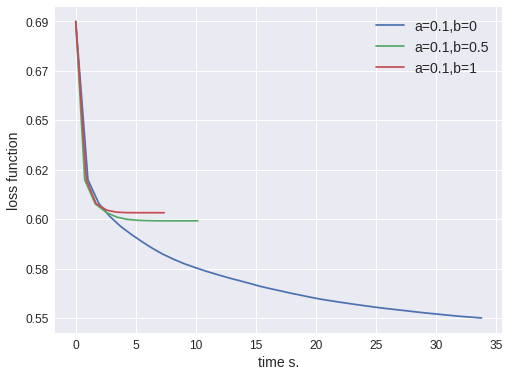

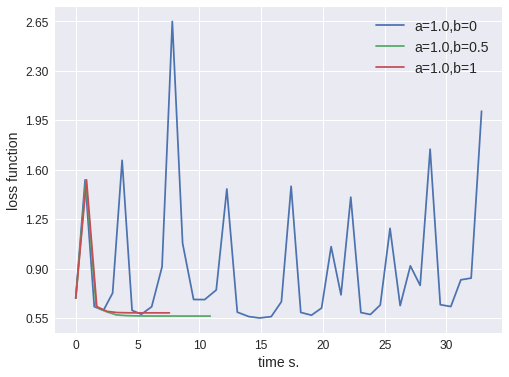

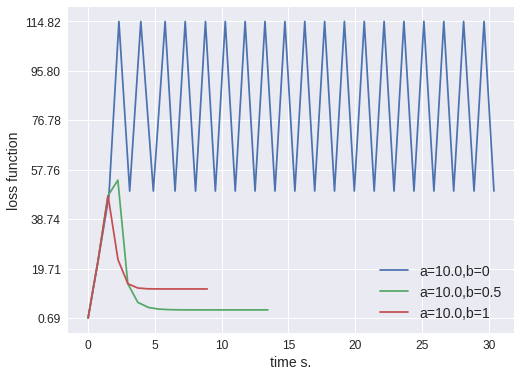

In [27]:
step_alpha = np.logspace(-1, 1, 3)
step_beta = [0, 0.5, 1]
for i, a in enumerate(step_alpha):
    fig = plt.figure(figsize=(8, 6))
    min_func = float("inf")
    max_func = float("-inf")
    for j, b in enumerate(step_beta):
        model = opt.GDClassifier(step_alpha=a, step_beta=b, l2_coef=0.1, max_iter=40, tolerance=1e-6)
        history = model.fit(X_train_v, y_train, trace=True)
        plt.plot(list(accumulate(history["time"])), history["func"], label=f"a={a},b={b}")
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
        plt.ylabel("loss function")
        plt.xlabel("time s.")
        min_func = min(*history["func"], min_func)
        max_func = max(*history["func"], max_func)
        plt.yticks(np.linspace(min_func, max_func, 7))
    plt.legend()
    fig.savefig(f"./_figures/task_3/sub_1/fig_a_{a}_b_{b}.pdf")
    plt.show()

### Пункт 2

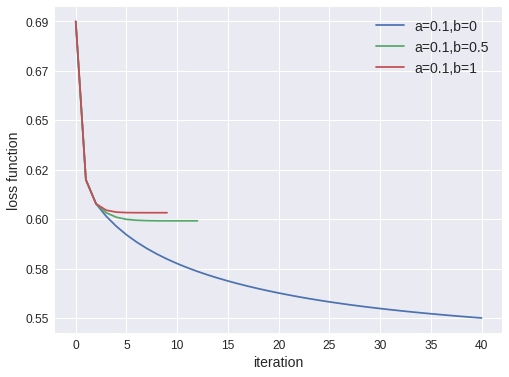

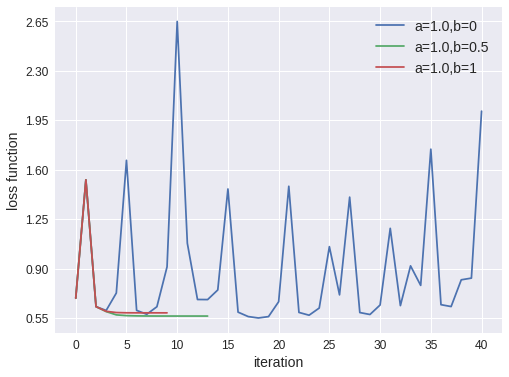

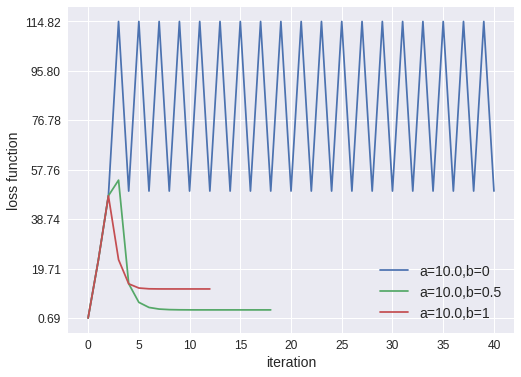

In [17]:
step_alpha = np.logspace(-1, 1, 3)
step_beta = [0, 0.5, 1]
max_iter = 40
for i, a in enumerate(step_alpha):
    fig = plt.figure(figsize=(8, 6))
    min_func = float("inf")
    max_func = float("-inf")
    for j, b in enumerate(step_beta):
        model = opt.GDClassifier(step_alpha=a, step_beta=b, l2_coef=0.1, max_iter=max_iter, tolerance=1e-6)
        history = model.fit(X_train_v, y_train, trace=True)
        plt.plot(np.arange(0, len(history["func"])), history["func"], label=f"a={a},b={b}")
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
        plt.ylabel("loss function")
        plt.xlabel("iteration")
        min_func = min(*history["func"], min_func)
        max_func = max(*history["func"], max_func)
        plt.yticks(np.linspace(min_func, max_func, 7))
    plt.legend()
    fig.savefig(f"./_figures/task_3/sub_2/fig_a_{a}_b_{b}.pdf")
    plt.show()

### Пункт 3

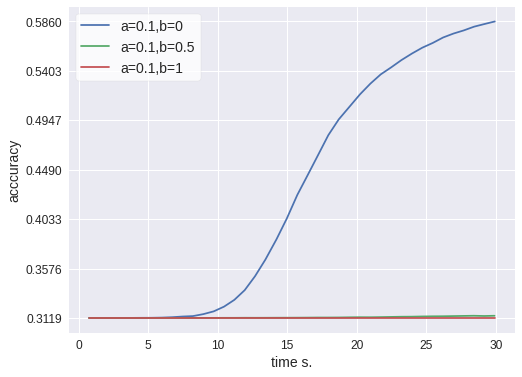

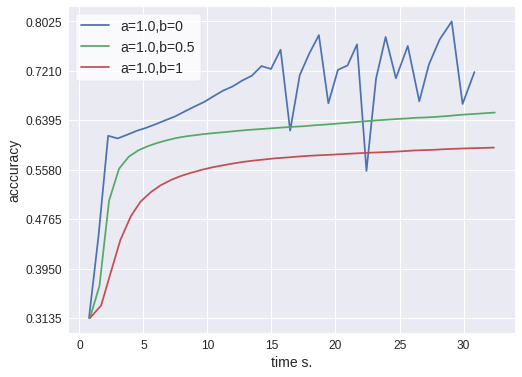

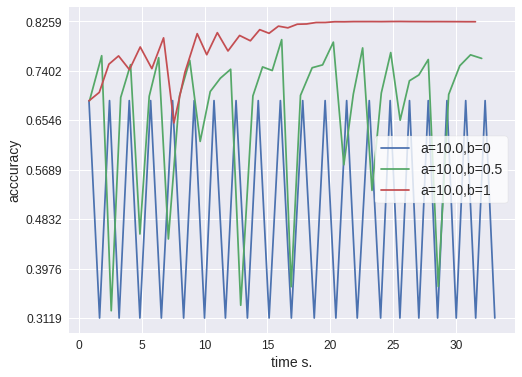

In [18]:
step_alpha = np.logspace(-1, 1, 3)
step_beta = [0, 0.5, 1]
max_iter = 40
for i, a in enumerate(step_alpha):
    fig = plt.figure(figsize=(8, 6))
    min_func = float("inf")
    max_func = float("-inf")
    for j, b in enumerate(step_beta):
        x_values = []
        times = []
        w_0 = np.ones(X_train_v.shape[1])
        for i in range(max_iter):
            model = opt.GDClassifier(step_alpha=a/(i+1)**b, step_beta=b,
                                     l2_coef=0.1, max_iter=1, tolerance=1e-6)
            history = model.fit(X_train_v, y_train, trace=True, w_0=w_0)
            w_0 = model.get_weights()
            x_values.append(acs(model.predict(X_train_v), y_train))
            times.append(history["time"][-1])

        plt.plot(list(accumulate(times)), x_values, label=f"a={a},b={b}")
        plt.ylabel("acccuracy")
        plt.xlabel("time s.")

        min_func = min(*x_values, min_func)
        max_func = max(*x_values, max_func)
        plt.yticks(np.linspace(min_func, max_func, 7))
    plt.legend(frameon=True,facecolor="white")
    fig.savefig(f"./_figures/task_3/sub_3/fig_a_{a}_b_{b}.pdf")
    plt.show()

### Пункт 4

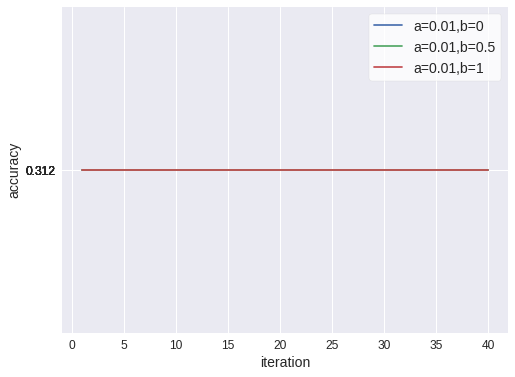

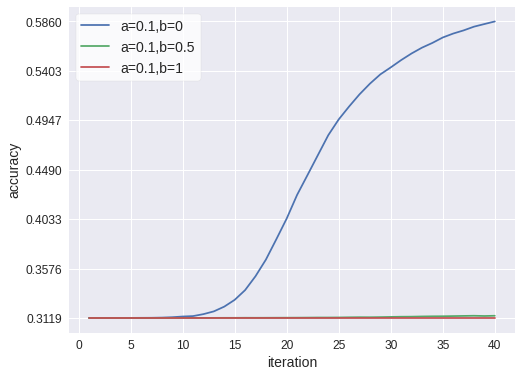

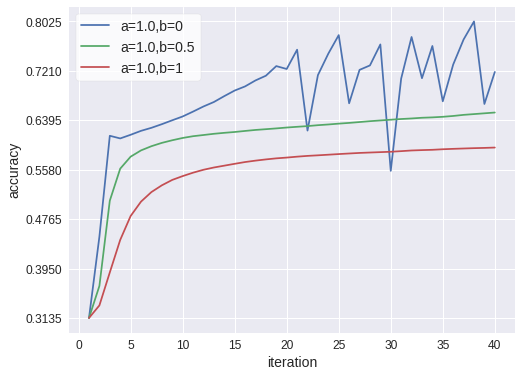

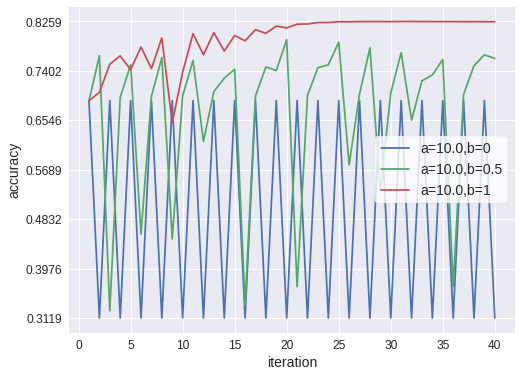

In [19]:
step_alpha = np.logspace(-2, 1, 4)
step_beta = [0, 0.5, 1]
max_iter = 40
for i, a in enumerate(step_alpha):
    fig = plt.figure(figsize=(8, 6))
    min_func = float("inf")
    max_func = float("-inf")
    for j, b in enumerate(step_beta):
        x_values = []
        w_0 = np.ones(X_train_v.shape[1])
        for i in range(max_iter):
            model = opt.GDClassifier(step_alpha=a/(i+1)**b, step_beta=b,
                                     l2_coef=0.1, max_iter=1, tolerance=1e-7)
    
            history = model.fit(X_train_v, y_train, trace=True, w_0=w_0)
            w_0 = model.get_weights()
            x_values.append(acs(model.predict(X_train_v), y_train))

        plt.plot(np.arange(1,len(x_values)+1), x_values, label=f"a={a},b={b}")
        plt.ylabel("accuracy")
        plt.xlabel("iteration")

        min_func = min(*x_values, min_func)
        max_func = max(*x_values, max_func)
        plt.yticks(np.linspace(min_func, max_func, 7))
    plt.legend(frameon=True,facecolor="white")
    fig.savefig(f"./_figures/task_3/sub_4/fig_a_{a}_b_{b}.pdf")
    plt.show()

### Для нормы весов

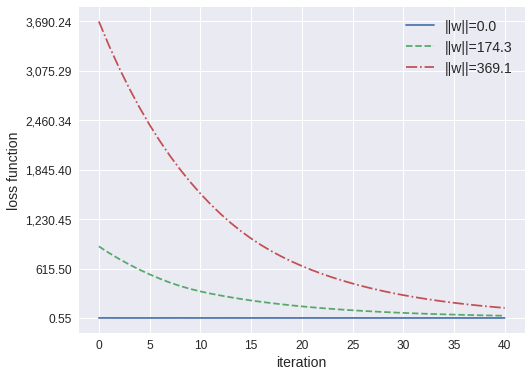

In [20]:
min_func = float("inf")
max_func = float("-inf")
fig = plt.figure(figsize=(8, 6))
rand = [(0,0), (5, 2), (10, 5)]
ls = ["-", "--", "-.", "-"]
for r, ls in zip(rand, ls):
    a, b = r[0],r[1]
    np.random.seed(42)
    w = b + (a-b)*np.random.rand(X_train_v.shape[1])
    model = opt.GDClassifier(step_alpha=0.8, step_beta=0, l2_coef=0.05,
                             max_iter=40, tolerance=1e-7)
    history = model.fit(X_train_v, y_train, trace=True, w_0=w)
    plt.plot(np.arange(len(history["func"])), history["func"], label=f"||w||={np.linalg.norm(w):.01f}", ls=ls)
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    plt.ylabel("loss function")
    plt.xlabel("iteration")
    min_func = min(*history["func"], min_func)
    max_func = max(*history["func"], max_func)
    plt.yticks(np.linspace(min_func, max_func, 7))
plt.legend()
fig.savefig(f"./_figures/task_3/weights.pdf")
plt.show()

## Задание №4

1. параметр размера шага step_alpha
2. параметр размера шага step_beta
3. размер подвыборки batch_size
4. начального приближения

### Пункт 1,2

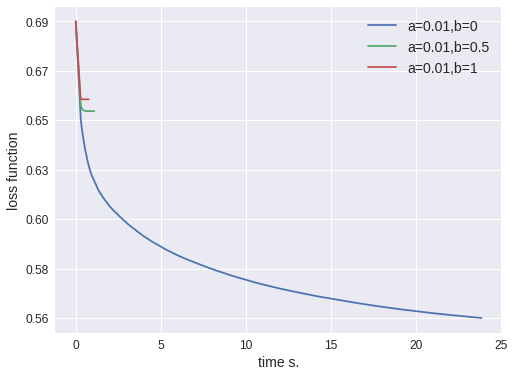

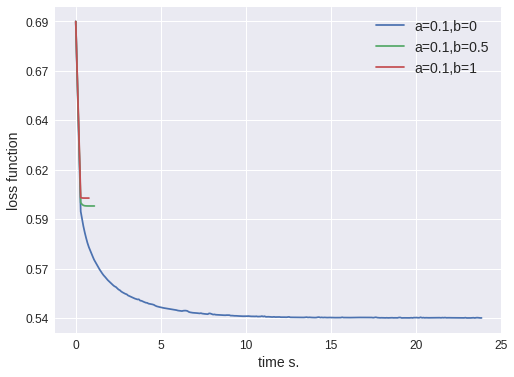

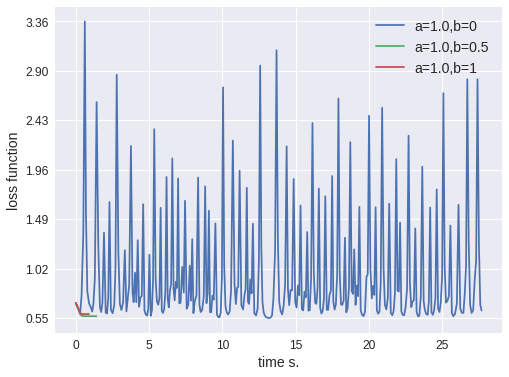

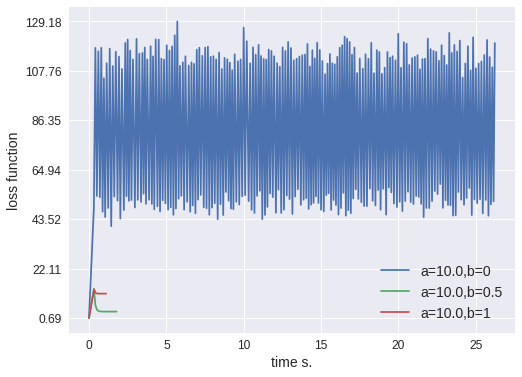

In [21]:
step_alpha = np.logspace(-2, 1, 4)
step_beta = [0, 0.5, 1]

for i, a in enumerate(step_alpha):
    fig = plt.figure(figsize=(8, 6))
    min_func = float("inf")
    max_func = float("-inf")
    for j, b in enumerate(step_beta):
        model = opt.SGDClassifier(batch_size=5000, step_alpha=a, step_beta=b,
                                  l2_coef=0.1, max_iter=300, tolerance=1e-7)
        history = model.fit(X_train_v, y_train, trace=True,log_freq=0.3)
        plt.plot(list(accumulate(history["time"])), history["func"], label=f"a={a},b={b}")
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
        plt.ylabel("loss function")
        plt.xlabel("time s.")
        min_func = min(*history["func"], min_func)
        max_func = max(*history["func"], max_func)
        plt.yticks(np.linspace(min_func, max_func, 7))
    plt.legend()
    fig.savefig(f"./_figures/task_4/sub_1/fig_a_{a}_b_{b}.pdf")
    plt.show()

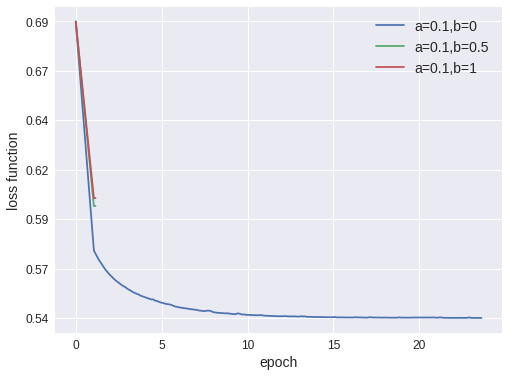

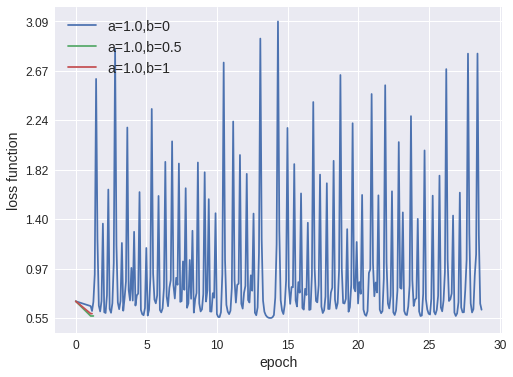

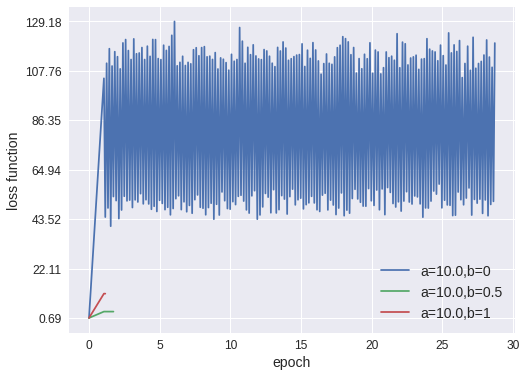

In [22]:
step_alpha = np.logspace(-1, 1, 3)
step_beta = [0, 0.5, 1]
for i, a in enumerate(step_alpha):
    fig = plt.figure(figsize=(8, 6))
    min_func = float("inf")
    max_func = float("-inf")
    for j, b in enumerate(step_beta):
        model = opt.SGDClassifier(batch_size=5000, step_alpha=a, step_beta=b,
                                  l2_coef=0.1, max_iter=300, tolerance=1e-6)
        history = model.fit(X_train_v, y_train, trace=True)
        plt.plot(history["epoch_num"], history["func"], label=f"a={a},b={b}")
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
        plt.ylabel("loss function")
        plt.xlabel("epoch")
        min_func = min(*history["func"], min_func)
        max_func = max(*history["func"], max_func)
        plt.yticks(np.linspace(min_func, max_func, 7))
    plt.legend()
    fig.savefig(f"./_figures/task_4/sub_2/fig_a_{a}_b_{b}.pdf")
    plt.show()

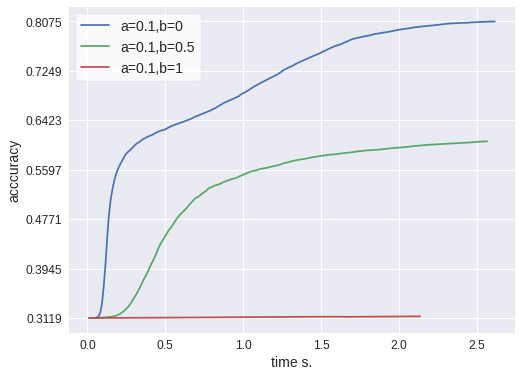

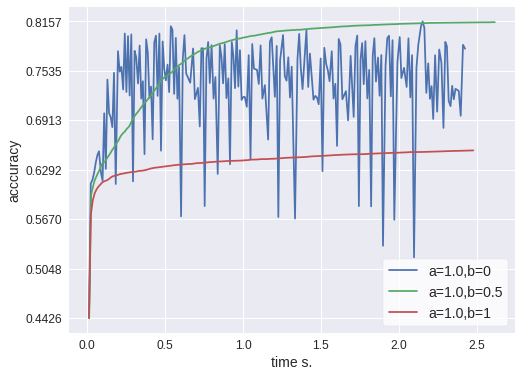

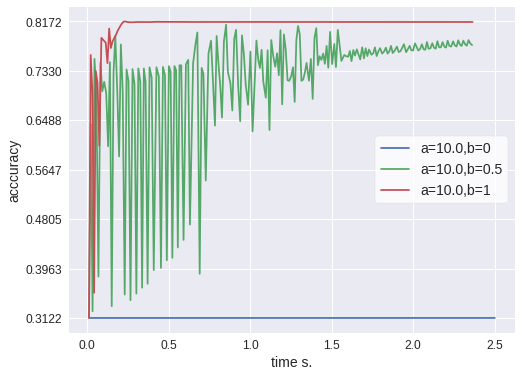

In [23]:
step_alpha = np.logspace(-1, 1, 3)
step_beta = [0, 0.5, 1]
max_iter = 200
for i, a in enumerate(step_alpha):
    fig = plt.figure(figsize=(8, 6))
    min_func = float("inf")
    max_func = float("-inf")
    for j, b in enumerate(step_beta):
        x_values = []
        times = []
        w_0 = np.ones(X_train_v.shape[1])
        for i in range(max_iter):
            model = opt.SGDClassifier(batch_size=2000, step_alpha=a/(i+1)**b, step_beta=b,
                                      l2_coef=0.1, max_iter=2, tolerance=1e-6)
            history = model.fit(X_train_v, y_train, trace=True, w_0=w_0, log_freq=0)
            w_0 = model.get_weights()
            x_values.append(acs(model.predict(X_train_v), y_train))
            times.append(history["time"][-1])

        plt.plot(list(accumulate(times)), x_values, label=f"a={a},b={b}")
        plt.ylabel("acccuracy")
        plt.xlabel("time s.")

        min_func = min(*x_values, min_func)
        max_func = max(*x_values, max_func)
        plt.yticks(np.linspace(min_func, max_func, 7))
    plt.legend(frameon=True, facecolor="white")
    fig.savefig(f"./_figures/task_4/sub_3/fig_a_{a}_b_{b}.pdf")
    plt.show()

### Пункт 3

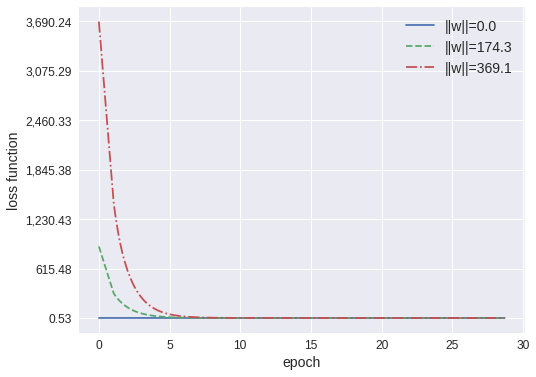

In [24]:
min_func = float("inf")
max_func = float("-inf")
fig = plt.figure(figsize=(8, 6))
rand = [(0,0), (5, 2), (10, 5)]
ls = ["-", "--", "-.", "-"]
for r, ls in zip(rand, ls):
    a, b = r[0], r[1]
    np.random.seed(42)
    w = b + (a-b)*np.random.rand(X_train_v.shape[1])
    model = opt.SGDClassifier(batch_size=5000, step_alpha=0.8, step_beta=0, l2_coef=0.05,
                              max_iter=300, tolerance=1e-7, random_seed=153)
    history = model.fit(X_train_v, y_train, trace=True, w_0=w)
    plt.plot(history["epoch_num"], history["func"], label=f"||w||={np.linalg.norm(w):.01f}", ls=ls)
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    plt.ylabel("loss function")
    plt.xlabel("epoch")
    min_func = min(*history["func"], min_func)
    max_func = max(*history["func"], max_func)
    plt.yticks(np.linspace(min_func, max_func, 7))
plt.legend()
fig.savefig(f"./_figures/task_4/weights.pdf")
plt.show()

### Пункт 4

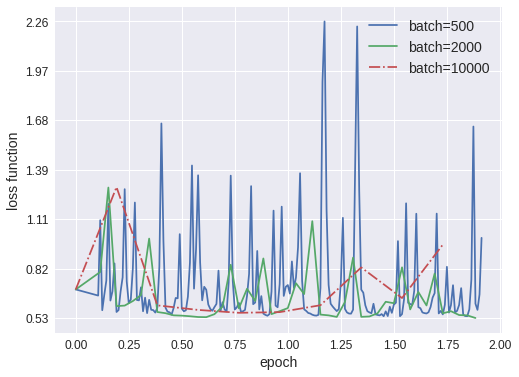

In [28]:
min_func = float("inf")
max_func = float("-inf")
fig = plt.figure(figsize=(8, 6))
batchs = [500, 2000, 10000]
ls = ["-", "-", "-.", "--"]
for b, ls in zip(batchs, ls):
    model = opt.SGDClassifier(batch_size=b, step_alpha=0.8, step_beta=0, l2_coef=0.05,
                              max_iter=100000//b, tolerance=1e-7, random_seed=153)
    history = model.fit(X_train_v, y_train, trace=True,log_freq=0.1)
    plt.plot(history["epoch_num"], history["func"], label=f"batch={b}", ls=ls)
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    plt.ylabel("loss function")
    plt.xlabel("epoch")
    min_func = min(*history["func"], min_func)
    max_func = max(*history["func"], max_func)
    plt.yticks(np.linspace(min_func, max_func, 7))
plt.legend()
fig.savefig(f"./_figures/task_4/fig_batch.pdf")
plt.show()

## Исследования

In [9]:
vectorizer = CountVectorizer(lowercase=True, min_df=50)
X_train_v = vectorizer.fit_transform(X_train["comment_text"])
X_test_v = vectorizer.transform(X_test["comment_text"])

In [10]:
X_train_v.shape

(52061, 3930)

In [11]:
from sklearn.model_selection import StratifiedKFold

In [ ]:

l2 = np.linspace(0.01, 0.3, 3)
scores = []
for a in step_alpha:
    for l in l2:
        cv = StratifiedKFold(n_splits=2, shuffle=True)
        score = []
        for train_index, test_index in cv.split(X_train_v, y_train):
            model = opt.SGDClassifier("binary_logistic", 2000, a, 0,
                                      tolerance=1e-5, max_iter=400, l2_coef=l)
            model.fit(X_train_v[train_index], y_train[train_index])
            y_pred = model.predict(X_train_v[test_index])
            score.append(acs(y_pred, y_train[test_index]))
        print(f"{a}, {l}, {score}")
        scores.append([score, a, l])

In [13]:
model = opt.SGDClassifier(batch_size=2000, step_alpha=0.7, step_beta=0,
                          tolerance=1e-6, max_iter=1500, l2_coef=0.001, fit_intercept=True)
history = model.fit(X_train_v, y_train, trace=True, log_freq=0.6)

In [15]:
y_pred_test = model.predict(X_test_v)
y_pred_train = model.predict(X_train_v)
y_pred_prob = model.predict_proba(X_test_v)

auc = roc_auc_score(y_test, y_pred_prob[:, 1], labels=[-1, 1])

auc, acs(y_pred_test, y_test)

(0.9282228868452114, 0.8598374927452118)

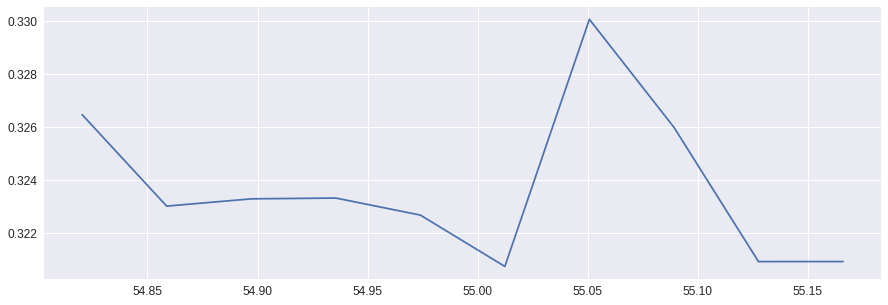

In [18]:
plt.plot(history["epoch_num"][-10:], history["func"][-10:])

In [21]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /home/tyskiy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/tyskiy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/tyskiy/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
# https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [23]:
X_train.head(5)

,Unnamed: 0,comment_text,is_toxic
0,0,explanation why the edits made under my userna...,False
1,1,d aww he matches this background colour i m s...,False
2,2,hey man i m really not trying to edit war it...,False
3,3,more i can t make any real suggestions on im...,False
4,4,you sir are my hero any chance you remember...,False


In [24]:
lemmatizer = WordNetLemmatizer()
X_train["comment_text"] = X_train["comment_text"].apply(
    lambda x: " ".join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(x)]))
X_test["comment_text"] = X_test["comment_text"].apply(
    lambda x: " ".join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(x)]))

## Задание №5

In [23]:
vectorizer = CountVectorizer(lowercase=True, min_df=50, stop_words="english")
X_train_v_lem = vectorizer.fit_transform(X_train["comment_text"])
X_test_v_lem = vectorizer.transform(X_test["comment_text"])

In [24]:
X_train_v_lem.shape, X_test_v_lem.shape

((52061, 3095), (20676, 3095))

In [58]:
#параметры подбраны на кросс-валидации
model = opt.SGDClassifier(batch_size=2000, step_alpha=0.4, step_beta=0,
                          tolerance=1e-9, max_iter=3000, l2_coef=0.001, fit_intercept=True)
history = model.fit(X_train_v_lem, y_train, trace=True, log_freq=0.7)

In [59]:
y_pred_test = model.predict(X_test_v_lem)
y_pred_train = model.predict(X_train_v_lem)

y_pred_prob = model.predict_proba(X_test_v_lem)
auc = roc_auc_score(y_test, y_pred_prob[:, 1], labels=[-1, 1])

auc, acs(y_pred_test, y_test), acs(y_pred_train, y_train)

(0.9350241299563347, 0.8650125749661444, 0.8821766773592516)

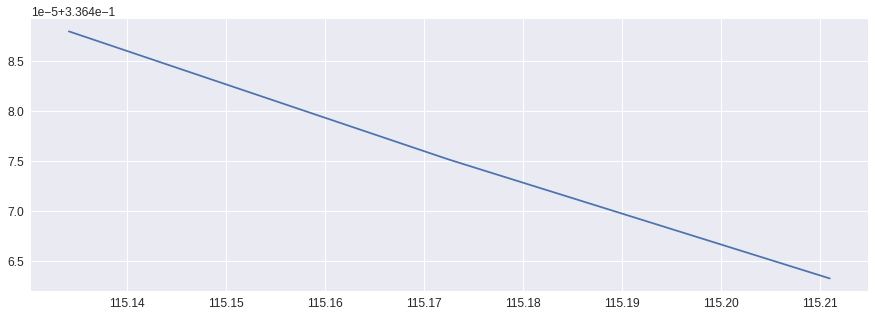

In [60]:
plt.plot(history["epoch_num"][-3:], history["func"][-3:])

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
vectorizer = TfidfVectorizer(lowercase=True, min_df=50, stop_words="english")
X_train_tf_lem = vectorizer.fit_transform(X_train["comment_text"])
X_test_tf_lem = vectorizer.transform(X_test["comment_text"])

In [ ]:
step_alpha = np.linspace(0.75, 1, 3)
step_beta = 0  # best
l2 = np.linspace(0.001, 0.015, 3)
scores = []
for a in step_alpha:
    for l in l2:
        cv = StratifiedKFold(n_splits=2, shuffle=True)
        score = []
        for train_index, test_index in cv.split(X_train_tf_lem, y_train):
            model = opt.SGDClassifier("binary_logistic", 2000, a, 0,
                                      tolerance=1e-5, max_iter=800, l2_coef=l)
            model.fit(X_train_tf_lem[train_index], y_train[train_index])
            y_pred = model.predict(X_train_tf_lem[test_index])
            score.append(acs(y_pred, y_train[test_index]))
        print(f"{a}, {l}, {score}")
        scores.append([score, a, l])

In [74]:
model = opt.SGDClassifier(batch_size=2000, step_alpha=0.4, step_beta=0,
                          tolerance=1e-7, max_iter=3000, l2_coef=0, fit_intercept=True)
history = model.fit(X_train_tf_lem, y_train, trace=True, log_freq=0.7)

In [75]:
y_pred_test = model.predict(X_test_tf_lem)
y_pred_train = model.predict(X_train_tf_lem)

y_pred_prob = model.predict_proba(X_test_tf_lem)
auc = roc_auc_score(y_test, y_pred_prob[:, 1], labels=[-1, 1])

auc, acs(y_pred_test, y_test), acs(y_pred_train, y_train)

(0.9352074822658164, 0.8534049139098472, 0.8416088818885538)

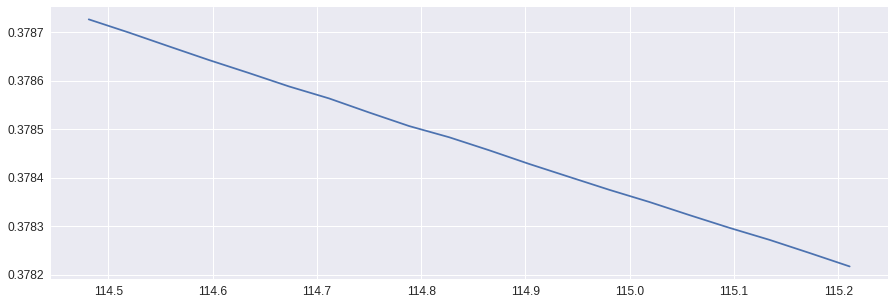

In [76]:
plt.plot(history["epoch_num"][-20:], history["func"][-20:])

### n-gramm

In [77]:
vectorizer = CountVectorizer(lowercase=True, min_df=50, ngram_range=[1, 2], stop_words="english")
X_train_v_lem_2g = vectorizer.fit_transform(X_train["comment_text"])
X_test_v_lem_2g = vectorizer.transform(X_test["comment_text"])

In [78]:
X_train_v_lem_2g.shape

(52061, 4040)

In [89]:
model = opt.SGDClassifier(batch_size=2000, step_alpha=0.4, step_beta=0,
                          tolerance=1e-7, max_iter=5000, l2_coef=0.0001, fit_intercept=True)
history = model.fit(X_train_v_lem_2g, y_train, trace=True, log_freq=0.7)

In [90]:
y_pred_test = model.predict(X_test_v_lem_2g)
y_pred_train = model.predict(X_train_v_lem_2g)

y_pred_prob = model.predict_proba(X_test_v_lem_2g)
auc = roc_auc_score(y_test, y_pred_prob[:, 1], labels=[-1, 1])

auc, acs(y_pred_test, y_test), acs(y_pred_train, y_train)

(0.9372150074902986, 0.875701296188818, 0.8985613030867636)

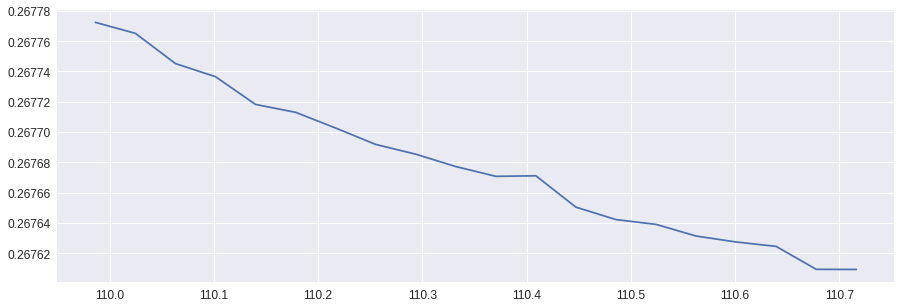

In [93]:
plt.plot(history["epoch_num"][-20:], history["func"][-20:])

## Задание №7

In [8]:
import time

In [31]:
vectorizer = CountVectorizer(lowercase=True, min_df=50, stop_words="english")
X_train_v = vectorizer.fit_transform(X_train["comment_text"])
X_test_v = vectorizer.transform(X_test["comment_text"])

In [53]:
sorted(list(vectorizer.vocabulary_.items()),key = lambda x: -x[1])[:10]

[('zionist', 3659),
 ('zero', 3658),
 ('youtube', 3657),
 ('youth', 3656),
 ('youre', 3655),
 ('young', 3654),
 ('york', 3653),
 ('yo', 3652),
 ('yesterday', 3651),
 ('yes', 3650)]

In [13]:
vectorizer = TfidfVectorizer(lowercase=True, min_df=50, stop_words="english")
X_train_tf_lem = vectorizer.fit_transform(X_train["comment_text"])
X_test_tf_lem = vectorizer.transform(X_test["comment_text"])

In [24]:
min_df = [10, 100, 400, 1000]
max_df = [300, 800, 20000]

In [25]:
shape = []
acc = []
t = []
for m in min_df:
    vectorizer = CountVectorizer(lowercase=True, min_df=m, stop_words="english")
    X_train_v = vectorizer.fit_transform(X_train["comment_text"])
    X_test_v = vectorizer.transform(X_test["comment_text"])
    shape.append(X_train_v.shape[1])
    start_time = time.time()
    model = opt.SGDClassifier(batch_size=2000, step_alpha=0.6, step_beta=0,
                              tolerance=1e-5, max_iter=800, l2_coef=0.001, fit_intercept=True)
    model.fit(X_train_v, y_train)
    t.append(time.time()-start_time)
    start_time = time.time()
    y_pred_test = model.predict(X_test_v)
    acc.append(round(acs(y_pred_test, y_test), 4))
print(shape)
print(acc)
print(t)

[10935, 2082, 515, 150]
[0.8512, 0.8501, 0.8369, 0.7841]
[23.88382911682129, 7.295434951782227, 3.482736825942993, 1.9634363651275635]


In [21]:
shape_2 = []
acc_2 = []
t_2 = []
for m in max_df:
    vectorizer = CountVectorizer(lowercase=True, min_df=50, max_df=m, stop_words="english")
    X_train_v = vectorizer.fit_transform(X_train["comment_text"])
    X_test_v = vectorizer.transform(X_test["comment_text"])
    shape_2.append(X_train_v.shape[1])
    start_time = time.time()
    model = opt.SGDClassifier(batch_size=2000, step_alpha=0.4, step_beta=0,
                              tolerance=1e-5, max_iter=1000, l2_coef=0.001, fit_intercept=True)
    model.fit(X_train_v, y_train)
    t_2.append(time.time()-start_time)
    start_time = time.time()
    y_pred_test = model.predict(X_test_v)
    acc_2.append(round(acs(y_pred_test, y_test), 4))
print(shape_2)
print(acc_2)
print(t_2)

[2957, 3452, 3660]
[0.7423, 0.8011, 0.8485]
[8.27504587173462, 9.799025535583496, 10.779331684112549]


In [23]:
shape = []
acc = []
t = []
for m in min_df:
    vectorizer = TfidfVectorizer(lowercase=True, min_df=m, stop_words="english")
    X_train_tf_lem = vectorizer.fit_transform(X_train["comment_text"])
    X_test_tf_lem = vectorizer.transform(X_test["comment_text"])
    shape.append(X_train_tf_lem.shape[1])
    start_time = time.time()
    model = opt.SGDClassifier(batch_size=2000, step_alpha=0.6, step_beta=0,
                              tolerance=1e-5, max_iter=800, l2_coef=0.001, fit_intercept=True)
    model.fit(X_train_tf_lem, y_train)
    t.append(time.time()-start_time)
    start_time = time.time()
    y_pred_test = model.predict(X_test_tf_lem)
    acc.append(round(acs(y_pred_test, y_test), 4))
print(shape)
print(acc)
print(t)

[10935, 2082, 515, 150]
[0.7475, 0.7788, 0.8089, 0.7824]
[23.265947580337524, 6.683082580566406, 3.14316987991333, 1.9221878051757812]


In [26]:
shape = []
acc = []
t = []
for m in max_df:
    vectorizer = TfidfVectorizer(lowercase=True, min_df=50, max_df=m, stop_words="english")
    X_train_tf_lem = vectorizer.fit_transform(X_train["comment_text"])
    X_test_tf_lem = vectorizer.transform(X_test["comment_text"])
    shape.append(X_train_tf_lem.shape[1])
    start_time = time.time()
    model = opt.SGDClassifier(batch_size=2000, step_alpha=0.6, step_beta=0,
                              tolerance=1e-5, max_iter=800, l2_coef=0.001, fit_intercept=True)
    model.fit(X_train_tf_lem, y_train)
    t.append(time.time()-start_time)
    start_time = time.time()
    y_pred_test = model.predict(X_test_tf_lem)
    acc.append(round(acs(y_pred_test, y_test), 4))
print(shape)
print(acc)
print(t)

[2957, 3452, 3660]
[0.6983, 0.7256, 0.766]
[7.428291320800781, 8.672260999679565, 10.543015956878662]


## Задание №8

In [25]:
vectorizer = CountVectorizer(lowercase=True, min_df=50, ngram_range=[1, 2], stop_words="english")
X_train_v_lem_2g = vectorizer.fit_transform(X_train["comment_text"])
X_test_v_lem_2g = vectorizer.transform(X_test["comment_text"])

In [26]:
X_train_v_lem_2g.shape

(52061, 4040)

In [27]:
model = opt.SGDClassifier(batch_size=2000, step_alpha=0.4, step_beta=0,
                          tolerance=1e-7, max_iter=3000, l2_coef=0.0001, fit_intercept=True)
history = model.fit(X_train_v_lem_2g, y_train, trace=True, log_freq=0.7)

In [28]:
y_pred_test = model.predict(X_test_v_lem_2g)
y_pred_train = model.predict(X_train_v_lem_2g)

y_pred_prob = model.predict_proba(X_test_v_lem_2g)
auc = roc_auc_score(y_test, y_pred_prob[:, 1], labels=[-1, 1])

auc, acs(y_pred_test, y_test), acs(y_pred_train, y_train)

(0.9372150074902986, 0.875701296188818, 0.8985613030867636)

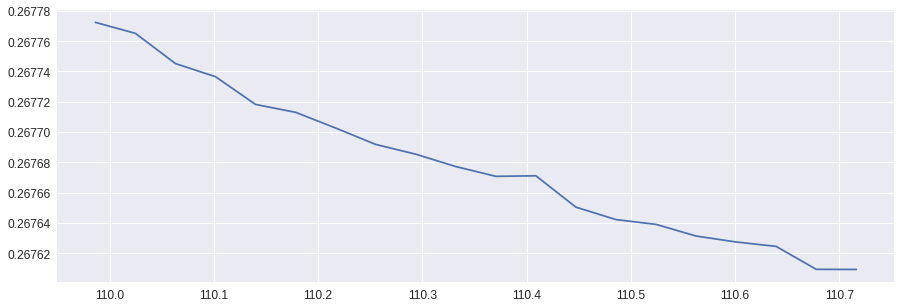

In [29]:
plt.plot(history["epoch_num"][-20:], history["func"][-20:])

### FP

In [46]:
X_test[(y_pred_test == 1) & (y_test == -1)]["comment_text"][20:30].values

array(['why be it a racist say pot call the kettle black',
       'btw it be amaze how look like a tax return form in the u they assume that everybody be retard',
       'cock i m confuse now it be fully protect until 5th december at the moment register user be crystal ball edit it but not actually vandalise it be you on irc i can not see you do you think it need take down to a day or two i be go to take it down to two day of full again it will look messy but to hell with it',
       'stop doubt me please stop say that user gabeyc be my puppet',
       'pavel fursov sorry i left my account log in at a public terminal and some idiot put it in my bad',
       'agree it be stupid to say that any malfoy be albino',
       'you wikipedia nazi need to stop remove information just because you dont know if a piece of information be true doesnt mean it s not true',
       'ariel i be not try to sound like a cock here but bite me it doesn t look like your an admin but i could be wrong i be watch

### FN

In [42]:
X_test[(y_pred_test == -1) & (y_test == 1)]["comment_text"][:10].values

array(['how dare you vandalize that page about the hm beagle don t vandalize again demon',
       'moi ego i be mortify that you could say such a thing poor old mona i always thiught she be a miserable look woman probably hormonal',
       'he be a ghay as fucker', 'hey shithead stop vandilizing article',
       'if ya not still fu k u',
       'x box 360 sukcs big bumm and like it up the as',
       'karl tearle be a mop haired twat',
       'give blowjob to hot woman from alderley edge cheshire',
       'i think you should delete the whole fuckin wikipedia',
       'shut up please this consensus be over'], dtype=object)